USING FUNCTIONAL API

In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from  matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops


In [3]:
#load dataset
train_dataset=h5py.File('datasets/train_signs.h5','r') # train_dataset.keys() contains --> ['list_classes', 'train_set_x', 'train_set_y']>
X_train_orig=np.array(train_dataset['train_set_x'][:]) # shape --> (1080, 64, 64, 3)
Y_train_orig=np.array(train_dataset['train_set_y'][:]) # shape --> (1080,)

test_dataset=h5py.File('datasets/test_signs.h5','r')
X_test_orig=np.array(test_dataset['test_set_x'][:]) # shape--> (120, 64, 64, 3)
Y_test_orig=np.array(test_dataset['test_set_y'][:])  # shape--> (120,)

classes=np.array(test_dataset['list_classes'][:]) # 6 classes -->array([0, 1, 2, 3, 4, 5], dtype=int64)

# reshape Y
Y_train_orig=Y_train_orig.reshape((1,Y_train_orig.shape[0])) # file.reshape(())/ file.reshape()--> both works
Y_test_orig= Y_test_orig.reshape((1,Y_test_orig.shape[0]))

y = 3


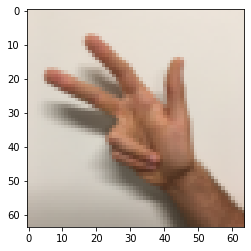

In [4]:
# Example of an image from the dataset
index=25
plt.imshow(X_train_orig[index])
print('y = '+str(np.squeeze(Y_train_orig[:,index]))) # np.squeeze() convert---> "array([3], dtype=int64)" into 3

In [5]:
classes

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [6]:
Y_train_orig.reshape(-1)   #--> converts (1, 1080) into (1080,)
print(Y_train_orig)
print('\n')
print(np.eye(6)[Y_train_orig.reshape(-1)])
print('\n')
print(np.eye(6)[Y_train_orig.reshape(-1)].T)

[[5 0 2 ... 2 4 5]]


[[0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]]


In [7]:
# Normalize the X
X_train=X_train_orig/255.
X_test=X_test_orig/255.

#Convert Y into one hot encoding (6 classes)
Y_train = (np.eye(6)[Y_train_orig.reshape(-1)].T).T
Y_test=(np.eye(6)[Y_test_orig.reshape(-1)].T).T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [25]:
#Forward propagation

def convolutional_model(input_shape):
    
    input_img=tf.keras.Input(shape=input_shape)
    Z1=tfl.Conv2D(filters=8, kernel_size=(4,4),strides=1, padding="same")(input_img)
    A1=tfl.ReLU()(Z1)
    P1=tfl.MaxPool2D(pool_size=(8,8),strides=8, padding="same")(A1)
    Z2=tfl.Conv2D(filters=16, kernel_size=(2,2), strides=1, padding="same")(P1)
    A2=tfl.ReLU()(Z2)
    P2=tfl.MaxPool2D(pool_size=(4,4),strides=(4,4),padding="same")(A2)
    F=tfl.Flatten()(P2)
    outputs=tfl.Dense(units=6,activation="softmax")(F)
    
    model=tf.keras.Model(inputs=input_img, outputs=outputs)
    
    return model

In [26]:
conv_model=convolutional_model((64,64,3))
conv_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
conv_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         392       
                                                                 
 re_lu_2 (ReLU)              (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_3 (ReLU)              (None, 8, 8, 16)          0         
                                                           

In [27]:
#Train the model
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 1s 53ms/step - loss: 1.8053 - accuracy: 0.1667 - val_loss: 1.7842 - val_accuracy: 0.1667
Epoch 2/100
17/17 [==============================] - 1s 45ms/step - loss: 1.7829 - accuracy: 0.2333 - val_loss: 1.7759 - val_accuracy: 0.3000
Epoch 3/100
17/17 [==============================] - 1s 46ms/step - loss: 1.7758 - accuracy: 0.2769 - val_loss: 1.7680 - val_accuracy: 0.4167
Epoch 4/100
17/17 [==============================] - 1s 45ms/step - loss: 1.7695 - accuracy: 0.3296 - val_loss: 1.7613 - val_accuracy: 0.4583
Epoch 5/100
17/17 [==============================] - 1s 46ms/step - loss: 1.7640 - accuracy: 0.3407 - val_loss: 1.7557 - val_accuracy: 0.3917
Epoch 6/100
17/17 [==============================] - 1s 46ms/step - loss: 1.7576 - accuracy: 0.3602 - val_loss: 1.7492 - val_accuracy: 0.4500
Epoch 7/100
17/17 [==============================] - 1s 49ms/step - loss: 1.7504 - accuracy: 0.3861 - val_loss: 1.7414 - val_accuracy: 0.4500
Epoch 

17/17 [==============================] - 1s 51ms/step - loss: 0.6734 - accuracy: 0.7787 - val_loss: 0.7437 - val_accuracy: 0.7417
Epoch 59/100
17/17 [==============================] - 1s 50ms/step - loss: 0.6662 - accuracy: 0.7824 - val_loss: 0.7377 - val_accuracy: 0.7333
Epoch 60/100
17/17 [==============================] - 1s 52ms/step - loss: 0.6594 - accuracy: 0.7852 - val_loss: 0.7333 - val_accuracy: 0.7417
Epoch 61/100
17/17 [==============================] - 1s 48ms/step - loss: 0.6529 - accuracy: 0.7833 - val_loss: 0.7291 - val_accuracy: 0.7417
Epoch 62/100
17/17 [==============================] - 1s 49ms/step - loss: 0.6462 - accuracy: 0.7852 - val_loss: 0.7245 - val_accuracy: 0.7417
Epoch 63/100
17/17 [==============================] - 1s 51ms/step - loss: 0.6398 - accuracy: 0.7852 - val_loss: 0.7198 - val_accuracy: 0.7417
Epoch 64/100
17/17 [==============================] - 1s 49ms/step - loss: 0.6336 - accuracy: 0.7880 - val_loss: 0.7154 - val_accuracy: 0.7500
Epoch 65/100

In [28]:
# History object
print(history.history.keys())
history.history

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


{'loss': [1.8053057193756104,
  1.7828532457351685,
  1.7757610082626343,
  1.7695010900497437,
  1.764000415802002,
  1.7575585842132568,
  1.750436782836914,
  1.7417320013046265,
  1.7310707569122314,
  1.7153960466384888,
  1.696030855178833,
  1.6724461317062378,
  1.6436975002288818,
  1.6091530323028564,
  1.5694713592529297,
  1.525588870048523,
  1.4786235094070435,
  1.4308077096939087,
  1.3857121467590332,
  1.3411797285079956,
  1.2994918823242188,
  1.2609797716140747,
  1.2196768522262573,
  1.183409333229065,
  1.151965618133545,
  1.12000572681427,
  1.0913491249084473,
  1.0659130811691284,
  1.0406256914138794,
  1.01763916015625,
  0.9956877827644348,
  0.9761761426925659,
  0.9565368890762329,
  0.9388467073440552,
  0.9208671450614929,
  0.9041513800621033,
  0.8896198868751526,
  0.8747513890266418,
  0.8614392876625061,
  0.8480755686759949,
  0.8358874320983887,
  0.8242853283882141,
  0.8126494884490967,
  0.8011294603347778,
  0.7898610234260559,
  0.77965968

C:\Users\tempt\Anaconda3\envs\Kanmani\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

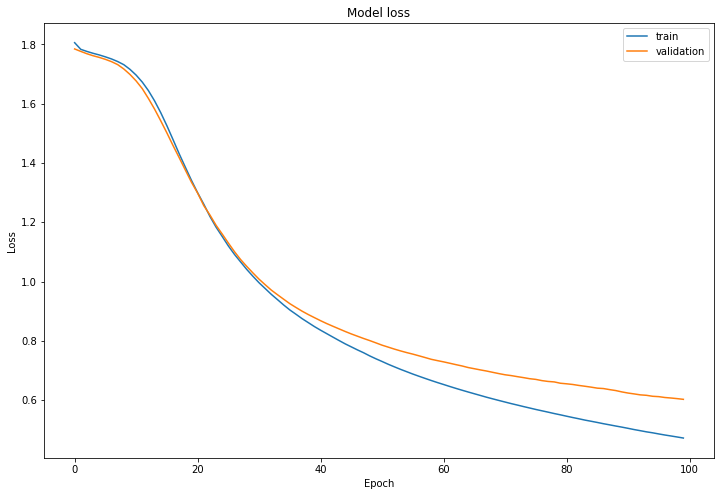

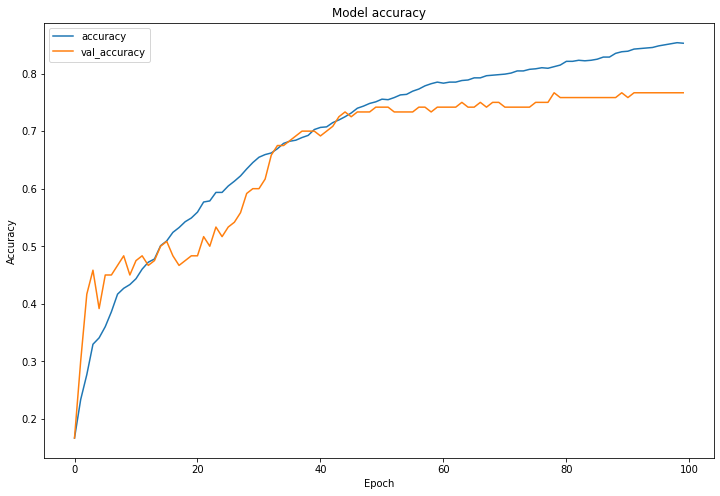

In [29]:
#visualize the loss over time using history.history
df_loss_acc=pd.DataFrame(history.history)
df_loss=df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc=df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename({'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title="Model loss",figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

#instead of 
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

#can we use the below code? what's the difference?
history = conv_model.fit(X_train,Y_train, epochs=100, batch_size=64, validation_data= (X_test,Y_test))